# Handwritten Digit Recognition with Pytorch
- From : (Handwritten Digit Recognition Using PyTorch — Intro To Neural Networks)[https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627]
- Augmented by fouVReaux

## Imports

In [6]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
import os

## Download The Dataset & Define The Transforms

The data base is from the [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

And is made of 4 files:
- `train-images-idx3-ubyte.gz`:  training set images (9912422 bytes)
- `train-labels-idx1-ubyte.gz`:  training set labels (28881 bytes)
- `t10k-images-idx3-ubyte.gz`:   test set images (1648877 bytes)
- `t10k-labels-idx1-ubyte.gz`:   test set labels (4542 bytes) 


1. **transforms.Compose()**- Composes several transforms together. (Transforms are common image transformations)

1. **transforms.ToTensor()** — converts the image into numbers, that are understandable by the system. It separates the image into three color channels (separate images): red, green & blue. Then it converts the pixels of each image to the brightness of their color between 0 and 255. These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.

2. **transforms.Normalize()** — normalizes the tensor with a mean and standard deviation which goes as the two parameters respectively.



In [7]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# load the training data
trainset = datasets.MNIST('MNIST_dataset/', download=True, train=True, transform=transform)

# load the validation data
valset = datasets.MNIST('MNIST_dataset/', download=True, train=False, transform=transform)

# combines the data-set, shuffle it and sample the set with a batch_size
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# combines the data-set, shuffle it and sample the set with a batch_size
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100.1%

Extracting MNIST_dataset/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_dataset/MNIST/raw


28.4%

113.5%

Extracting MNIST_dataset/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_dataset/MNIST/raw


100.4%

Extracting MNIST_dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_dataset/MNIST/raw


180.4%

Extracting MNIST_dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_dataset/MNIST/raw
Processing...
Done!


In [30]:
# create an iter var on the train batch
dataiter = iter(trainloader)
# get images of the first batch
images, labels = dataiter.next()
# the batch is a torch tensor
print(type(images))
# the size of the iter is the same as the batch * number of letters * 
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
#plot a random image of the first batch
plt.imshow(images[0].numpy().squeeze());

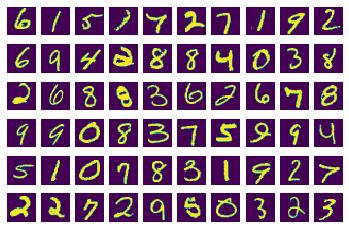

In [40]:
#plot a set of 60 random images of the first batch
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze())

In [41]:
# import torch neural network
from torch import nn

# Layer details for the neural network
input_size = 784 # (28 x 28)
hidden_sizes = [128, 64] 
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)


In [42]:
# The negative log likelihood loss. It is useful to train a classification problem with C classes 
# (C = number of classes).
criterion = nn.NLLLoss()
# get the next set of minibatch
images, labels = next(iter(trainloader))
# get the pixels values of the images
images = images.view(images.shape[0], -1)
# put the set at the input of the model
logps = model(images)
# defintion of the minimisation criterion (here negative log likelihood loss)
loss = criterion(logps, labels)

In [16]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 2.0519e-03,  2.0519e-03,  2.0519e-03,  ...,  2.0519e-03,
          2.0519e-03,  2.0519e-03],
        [ 1.8749e-03,  1.8749e-03,  1.8749e-03,  ...,  1.8749e-03,
          1.8749e-03,  1.8749e-03],
        [-1.4522e-03, -1.4522e-03, -1.4522e-03,  ..., -1.4522e-03,
         -1.4522e-03, -1.4522e-03],
        ...,
        [-4.7809e-03, -4.7809e-03, -4.7809e-03,  ..., -4.7809e-03,
         -4.7809e-03, -4.7809e-03],
        [ 1.1710e-03,  1.1710e-03,  1.1710e-03,  ...,  1.1710e-03,
          1.1710e-03,  1.1710e-03],
        [ 8.1710e-05,  8.1710e-05,  8.1710e-05,  ...,  8.1710e-05,
          8.1710e-05,  8.1710e-05]])


In [17]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [18]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-1.9514e-02, -5.7096e-03,  9.3193e-03,  ..., -7.1421e-03,
          4.7154e-03,  6.9779e-03],
        [ 2.7847e-02, -1.1281e-02, -8.0161e-05,  ..., -2.2816e-03,
          2.3848e-02,  3.0404e-02],
        [-1.2919e-02,  2.3202e-02, -9.8602e-03,  ..., -2.8790e-02,
          1.0087e-02, -7.7195e-03],
        ...,
        [ 7.3265e-03,  3.0934e-02, -3.1435e-02,  ...,  3.0026e-02,
          7.6962e-03,  3.2816e-02],
        [-2.6857e-02,  7.2847e-03, -1.7667e-02,  ...,  5.8748e-03,
          3.3112e-02, -2.1735e-02],
        [ 2.3754e-02,  2.7987e-02,  3.3853e-02,  ...,  3.3701e-02,
          1.9823e-02, -1.5445e-02]], requires_grad=True)
Gradient - tensor([[ 1.3811e-03,  1.3811e-03,  1.3811e-03,  ...,  1.3811e-03,
          1.3811e-03,  1.3811e-03],
        [ 1.8501e-03,  1.8501e-03,  1.8501e-03,  ...,  1.8501e-03,
          1.8501e-03,  1.8501e-03],
        [ 2.1376e-03,  2.1376e-03,  2.1376e-03,  ...,  2.1376e-03,
          2.1376e-03,  

In [19]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-1.9527e-02, -5.7234e-03,  9.3055e-03,  ..., -7.1559e-03,
          4.7016e-03,  6.9641e-03],
        [ 2.7829e-02, -1.1299e-02, -9.8662e-05,  ..., -2.3001e-03,
          2.3829e-02,  3.0386e-02],
        [-1.2940e-02,  2.3181e-02, -9.8816e-03,  ..., -2.8812e-02,
          1.0065e-02, -7.7408e-03],
        ...,
        [ 7.3036e-03,  3.0911e-02, -3.1458e-02,  ...,  3.0003e-02,
          7.6733e-03,  3.2793e-02],
        [-2.6848e-02,  7.2930e-03, -1.7659e-02,  ...,  5.8832e-03,
          3.3121e-02, -2.1727e-02],
        [ 2.3754e-02,  2.7986e-02,  3.3853e-02,  ...,  3.3701e-02,
          1.9823e-02, -1.5445e-02]], requires_grad=True)


In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.637862882801274
Epoch 1 - Training loss: 0.29248580381846123
Epoch 2 - Training loss: 0.23033943350142888
Epoch 3 - Training loss: 0.18613872786304717
Epoch 4 - Training loss: 0.1550202311745394
Epoch 5 - Training loss: 0.1325083802700408
Epoch 6 - Training loss: 0.11562566863182289
Epoch 7 - Training loss: 0.10120839470111803
Epoch 8 - Training loss: 0.09065095586444079
Epoch 9 - Training loss: 0.08256767277043861
Epoch 10 - Training loss: 0.07431403546979322
Epoch 11 - Training loss: 0.06838906135833038
Epoch 12 - Training loss: 0.06278355201797635
Epoch 13 - Training loss: 0.057555997268364294
Epoch 14 - Training loss: 0.053774034790843646

Training Time (in minutes) = 4.061367762088776


In [22]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 3


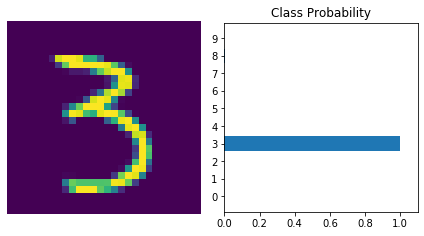

In [35]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

## Validation phase

In [24]:
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        # Turn off gradients to speed up this part
        with torch.no_grad():
            logps = model(img)

        # Output of the network are log-probabilities, need to take exponential for probabilities
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9763
